# Assignment 1-2: Data Collection Using Web APIs

## Objective

Many Websites (such as Twitter, Yelp, Spotify) provide free APIs to allow users to access their data. *API wrappers* simplify the use of these APIs by wrapping API calls into easy-to-use Python functions. At SFU, we are developing a unified API wrapper, called [DataPrep.Connector](https://docs.dataprep.ai/user_guide/connector/introduction.html#userguide-connector), which offers a unified programming interface to collect data from a variety of Web APIs.

In this assignment, you will learn the following:

* How to ask insightful questions about data
* How to collect data from Web APIs using DataPrep.Connector

**Requirements:**

1. Please use [pandas.DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) rather than spark.DataFrame to manipulate data.

2. Please follow the python code style (https://www.python.org/dev/peps/pep-0008/). If TA finds your code hard to read, you will lose points. This requirement will stay for the whole semester.

## Preliminary

DataPrep.Connector is very easy to learn. By watching this 10-min [PyData Global 2020 talk](https://www.youtube.com/watch?v=56qu-0Ka-dA), you should be able to know how to use it. 

If you want to know more, below are some other useful resources.

* [Quick Introduction](https://github.com/sfu-db/dataprep#connector)
* [User Guide](https://sfu-db.github.io/dataprep/user_guide/connector/connector.html) 
* [Examples](https://github.com/sfu-db/dataprep/tree/develop/examples)
* [Fetch and analyze COVID-19 tweets using DataPrep](https://www.youtube.com/watch?v=vvypQB3Vp1o)

## Overview

This is a **group** assignment. Please check your group in this [PDF file](https://coursys.sfu.ca/2022sp-cmpt-733-g1/pages/Web-API-Assignment/view).

To do this assignment, your group needs to go through four steps:

1. Select a new Web API that is not listed on https://github.com/sfu-db/APIConnectors. 
2. Create a configuration file for the API (see tutorials at [link1](https://github.com/sfu-db/APIConnectors/blob/develop/CONTRIBUTING.md#add-configuration-files) and [link2](https://github.com/sfu-db/EZHacks-tutorial/blob/master/2.%20Tutorial.ipynb)). 
3. Come up with four questions about the API. 
4. Write code to answer these questions one by one.

For Step 3, please make sure your questions are **good**.

## What are "good questions"?

Please use the following to judge whether your questions are good or not.

1. Good questions need to be useful. That is, they are common questions asked about the API.
2. Good questions need to be diverse. That is, they cover different aspects of the API. 
3. Good questions have to cover different difficulty levels. That is, it consists of both easy and difficult questions,  where the difficulty can be measured by the number of lines of code or the number of input parameters.

The following shows four good questions about the Yelp API. The corresponding code can be found at this [link](https://github.com/sfu-db/DataConnectorConfigs#yelp----collect-local-business-data).

* Q1. What's the phone number of Capilano Suspension Bridge Park?
* Q2. Which yoga store has the highest review count in Vancouver?
* Q3. How many Starbucks stores are in Seattle and where are they?
* Q4. What are the ratings for a list of restaurants?

**Why are they useful?**
* Q1 is useful because "Capilano Suspension Bridge Park" is one of the most popular tourist attractions in Vancouver.
* Q2 is useful because a yoga fan wants to find out the most popular yoga store in Vancouver. 
* Q3 is useful because Starbucks was founded in Seattle.
* Q4 is useful because people often rely on yelp ratings to decide which restaurant to go to.

**Why are they diverse?**

This is because the [code](yelp-code.png) written to answer them has different inputs or outputs.
* Q1 takes `term` and `location` as input and returns 1 record with attributes `name` and `phone` 
* Q2 takes `categories`, `location`, and `sort_by` as input and returns 1 record with attributes `name` and `review_count`
* Q3 takes `term` and `location` as input and returns n records with attributes `name`, `address`, `city`, `state`, `country`, `zipcode`
* Q4 takes a list of retarurant `names` as input and return n records with attributes `name`, `rating`, `city`

**Why are they more and more difficult?**
* Q1 (4 lines of code, 2 query parameters)
* Q2 (4 lines of code, 3 query parameters)
* Q3 (5 lines of code, 2 query parameters)
* Q4 (11 lines of code, 2 query parameters)

Please note that you have to use DataPrep.Connector to get data from the Web API. If DataPrep.Connector cannot meet your needs, please post your questions on Slack (Channel: Assignment 1). We will help you. 

## Now, it's your turn. :) 

Please write down your questions and the corresponding code for your assigned API. 

In [1]:
## Provide your API key here for TAs to reproduce your results
from dataprep.connector import Connector
dc = Connector('./tmdb')
apikey = '578152be1392218f6d775ceb67b4e4f6'

### Q1

Who is the most popular spiderman?

We can see that currently the most popular spiderman is Tom Holland by a very wide margin.  This is likely due to two parts, the first being that the current spiderman movies are exceedly popular and because Tom Holland is the current spiderman leading to a greater popularity at this point in time.

In [2]:
import pandas as pd

# Searching on each spiderman to get their id number
tom_holland = await dc.query('person', api_key=apikey, query='tom holland')
andrew_garfield = await dc.query('person', api_key=apikey, query='andrew garfield')
tobey_maguire = await dc.query('person', api_key=apikey, query='tobey maguire')

# Filtering to the most popular person, as their are multiple people named tom holland for instance
tom_holland = tom_holland[tom_holland['popularity'] == max(tom_holland['popularity'])]
andrew_garfield = andrew_garfield[andrew_garfield['popularity'] == max(andrew_garfield['popularity'])]
tobey_maguire = tobey_maguire[tobey_maguire['popularity'] == max(tobey_maguire['popularity'])]

# Concatinating the actors into a single dataframe
spiderman_actors = pd.concat([tom_holland, andrew_garfield, tobey_maguire])
spiderman_actors

NumExpr defaulting to 8 threads.


,id,name,popularity
0,1136406,Tom Holland,155.501
0,37625,Andrew Garfield,83.872
0,2219,Tobey Maguire,38.746


**Q2**

Which Canadian TV genre is most popular?

Canadian TV shows of the Family genre are most popular compared to all others. From the insight obtained, the probability of releasing new TV shows of the family genre getting popular is high. The understanding is obtained by adding the popularity of a particular genre id and merging tv table with the genre table to fetch the genre name.

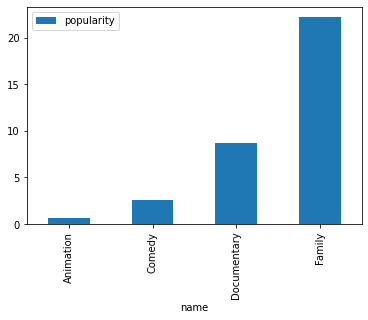

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#Searching Canadian TV shows and respective genre id
df_tv = await dc.query('tv', api_key=apikey, query='Canada')
col = [df_tv.genre_ids[i].pop() if len(df_tv.genre_ids[i])>0  else None for i in range (df_tv.shape[0])] 
n = df_tv.columns[-1]
df_tv.drop(n, axis = 1, inplace = True)
df_tv[n] = col
df_tv = df_tv.groupby(['genre_ids']).popularity.sum().reset_index()
df_tv = df_tv.rename(columns={'genre_ids': 'id'})
df_genres = await dc.query('genres', api_key=apikey)

#Fetching genre name
df = pd.merge(df_tv, df_genres, how="left", on='id')
df = df.dropna(subset=['name'])

#Visualizing the result
df.plot(x='name', y='popularity', kind='bar') 
plt.show()

**Q3**

Is there a relationship between the day of release of the movie to its popularity?

Here we try to figure out whether there is a relationship between the popularity of a movie to its release date. The more popular the movie is more will be its profitability.

Here we see that movies that tend to release during the weekend or near the weekend(Thursday and Friday) have higher chances to become more popular among the audience.

This data can help the production staff and marketing team to figure out the release day of the movie to target a larger audience and increase the chances of a movie becoming more popular.

<AxesSubplot:xlabel='day_of_week'>

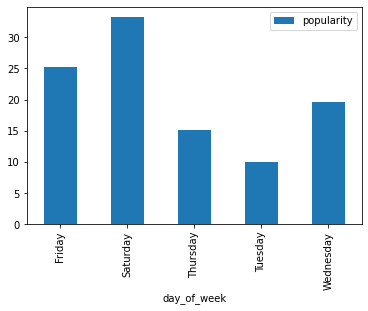

In [4]:
from dataprep.connector import Connector
import pandas as pd

dc = Connector('./tmdb')

# Fetch all the movies which are currently been played in the theatre. We have not used past data as the trend will be different during the covid phase.
current_movies = await dc.query('movies', api_key=apikey,query=100)
current_movies['release_date']=pd.to_datetime(current_movies['release_date'])

#Figure out the day of release from the release date
current_movies['day_of_week']=current_movies['release_date'].map(lambda x: x.day_name())

# Group movies by day of week
movies_group_by_day=current_movies.groupby('day_of_week',as_index=False).mean('popularity')
movies_group_by_day.plot.bar(x='day_of_week',y='popularity')


### Q4 ...

Which genre is most popular in top rated movie and top rated tv shows and what is the trend of genre being most common over the years for both movies and tv shows?

The most common genre in top rated movies is "DRAMA" and in top rated tv shows is "ANIMATION".
As seen in the table for the top rated movies:
    1. Before 2000 the DRAMA genre was the most common
    2. But after 2020 the ROMANCE genre became one of the most common genre.
As seen in the table for the top rated tv shows:
    1. The genre ANIMATION remain the most common.

The understanding is obtained by getting the genres of top rated movies and tv shows and then finding the occurances of genre and then getting the maximum occurred genre and sorting the table by the year to see the trend over the years for top rated movies and trends.

In [5]:
## Write your code

def get_key(val,my_dict):
    for key, value in my_dict.items():
         if val == value:
             return key

import matplotlib.pyplot as plt
gen = await dc.query('genres',api_key = '578152be1392218f6d775ceb67b4e4f6')
genres = dict(zip(gen.name, gen.id))

mov = await dc.query('toprated_movie',api_key = '578152be1392218f6d775ceb67b4e4f6')
genre_movie= dict(zip(mov.original_title, mov.genre_ids))
genres_m={}
genres_t={}
for key, value in genre_movie.items():
        v= value[0]
        genres_m[key]=v


tvs = await dc.query('toprated_tv',api_key = '578152be1392218f6d775ceb67b4e4f6')
genre_tv= dict(zip(tvs.name, tvs.genre_ids))
for key, value in genre_tv.items():
        if len(value)>=1:
            v= value[0]
        else:
            v='None'
        genres_t[key]=v


genre_movie={}
genre_tv={}
for key, value in genres_m.items():
    for k, v in genres.items():
        if value == v:
            genre_movie[key]=k

for key, value in genres_t.items():
    if list(genres.values()).__contains__(value):
        genre_tv[key]=get_key(value,genres)
        
    else:
        genre_tv[key]='not given'
    
tv = tvs[['name','first_air_date']]
vs = genre_tv.values()
tv['genre'] = list(vs)
tv['first_air_date']=pd.to_datetime(tv['first_air_date']).dt.year
tv = tv.sort_values(by=['first_air_date'])


for key, value in genres_m.items():
    if list(genres.values()).__contains__(value):
        genre_movie[key]=get_key(value,genres)
        
    else:
        genre_movie[key]='none'

movie = mov[['original_title','release_date']]
ms= genre_movie.values()
movie['genre'] = list(ms)
movie['release_date']=pd.to_datetime(movie['release_date']).dt.year
movie = movie.sort_values(by=['release_date'])



most_common_genre_movie= max(list(genre_movie.values()), key = list(genre_movie.values()).count)
most_common_genre_tv = max(list(genre_tv.values()), key = list(genre_tv.values()).count)

print("most common genre of top rated movie: " + most_common_genre_movie)

print("most common genre of top rated tv :" + most_common_genre_tv)

print (movie)

most common genre of top rated movie: Drama
most common genre of top rated tv :Animation
                                   original_title  release_date      genre
14                                   12 Angry Men          1957      Drama
2                                   The Godfather          1972      Drama
6                          The Godfather: Part II          1974      Drama
4                                Schindler's List          1993      Drama
1                        The Shawshank Redemption          1994      Drama
17                                   Pulp Fiction          1994   Thriller
0                    दिलवाले दुल्हनिया ले जायेंगे          1995     Comedy
15                                 The Green Mile          1999    Fantasy
19                          O Auto da Compadecida          2000  Adventure
10                                       千と千尋の神隠し          2001  Animation
18  The Lord of the Rings: The Return of the King          2003  Adventure
16         

<ipython-input-5-a8c725382016>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv['genre'] = list(vs)
<ipython-input-5-a8c725382016>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv['first_air_date']=pd.to_datetime(tv['first_air_date']).dt.year
<ipython-input-5-a8c725382016>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

## Submission

Complete this notebook, rename it to `A1-2-[WEB API Name].ipynb`, and submit it along with your config files to the CourSys activity `Assignment 1 - Part 2`. For example, if your group works on Yelp, then **every member of your group** needs to submit the same notebook named `A1-2-Yelp.ipynb` and the config files named `config.zip`.